# **DEEP LEARNING**

Name: **OPTIMISATION**  
Date : 2023  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

## REGULARISATION

### Sans régularisation

In [29]:
from keras.models import Sequential
from keras.layers import *  
import tensorflow as tf
import keras
import numpy as np


import keras.backend as K

def custom_mse(y_true, y_pred):
    loss = K.square(y_pred - y_true)
    return loss


weights = np.array([[[0.800],[0.05]]])
lr = 0.1
epoch = 1

model_0 = Sequential()    
model_0.add(Input(shape=(2)))
model_0.add(Dense(1,activation='sigmoid', use_bias=False))
model_0.layers[0].set_weights(weights) 
optimizerSGD = keras.optimizers.SGD(learning_rate=lr)
model_0.compile(loss=custom_mse, optimizer=optimizerSGD)


In [30]:
weights = model_0.get_weights() 
print(weights)

[array([[0.8 ],
       [0.05]], dtype=float32)]


In [31]:
X = [[1.5,3]]
Y = [0.5]
History = model_0.fit(X,Y,epochs=1,verbose=True)

1/1 [==============================] - 0s 322ms/step - loss: 0.0865


In [32]:
weights = model_0.get_weights() 
print(weights)

[array([[0.785574  ],
       [0.02114804]], dtype=float32)]


### Avec régularisation

$$L1 = Loss + \alpha\sum^p_{i=1}\vert b_j \vert$$

L1-Regularization permet d’effectuer une feature selection plus précise (trouver des sous-ensembles de données pertinents)

$$L2 = Loss + \alpha\sum^p_{i=1}b_j^2$$

L2-Regularization permet d’effectuer un apprentissage plus rapide

In [50]:
from tensorflow.keras.regularizers import l2 #Ridge

def custom_mse(y_true, y_pred):
    loss = K.square(y_pred - y_true)
    return loss


weights = np.array([[[0.800],[0.05]]])
lr = 0.1
epoch = 1

model_0 = Sequential()    
model_0.add(Input(shape=(2)))
model_0.add(Dense(1,activation='sigmoid', use_bias=False, kernel_regularizer=l2(0.7)))
model_0.layers[0].set_weights(weights) 
optimizerSGD = keras.optimizers.SGD(learning_rate=lr)
model_0.compile(loss=custom_mse, optimizer=optimizerSGD)

In [51]:
weights = model_0.get_weights() 
print(weights)

[array([[0.8 ],
       [0.05]], dtype=float32)]


In [52]:
X = [[1.5,3]]
Y = [0.5]
History = model_0.fit(X,Y,epochs=1,verbose=True)

1/1 [==============================] - 0s 228ms/step - loss: 0.5363


In [53]:
weights = model_0.get_weights() 
print(weights)

[array([[0.67357403],
       [0.01414805]], dtype=float32)]


Le poids de plus grande valeur a subit davantage de mise à jour.

##Téléchargement des données

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy

In [ ]:
def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = prepare_mnist()
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) (60000, 10)


## Sans régularisation

In [ ]:
layer1 = Dense(units=128, activation="relu", input_dim=784)
layer2 = Dense(units=128, activation="relu" )
layer3 = Dense(units=128, activation="relu")
layer4 = Dense(units=10, activation="softmax")


model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

cb = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3)




Epoch 1/10
210/210 - 3s - loss: 0.4209 - accuracy: 0.8811 - val_loss: 0.1985 - val_accuracy: 0.9395 - 3s/epoch - 12ms/step
Epoch 2/10
210/210 - 2s - loss: 0.1513 - accuracy: 0.9555 - val_loss: 0.1468 - val_accuracy: 0.9547 - 2s/epoch - 7ms/step
Epoch 3/10
210/210 - 2s - loss: 0.1019 - accuracy: 0.9690 - val_loss: 0.1169 - val_accuracy: 0.9652 - 2s/epoch - 7ms/step
Epoch 4/10
210/210 - 1s - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.1088 - val_accuracy: 0.9681 - 1s/epoch - 7ms/step
Epoch 5/10
210/210 - 2s - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.1100 - val_accuracy: 0.9687 - 2s/epoch - 7ms/step
Epoch 6/10
210/210 - 1s - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.1128 - val_accuracy: 0.9678 - 1s/epoch - 7ms/step
Epoch 7/10
210/210 - 1s - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.1083 - val_accuracy: 0.9698 - 1s/epoch - 7ms/step
Epoch 8/10
210/210 - 2s - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.1053 - val_accuracy: 0.9722 - 2s/epoch - 7ms/step
Epoch 9/10
210/210 - 1s

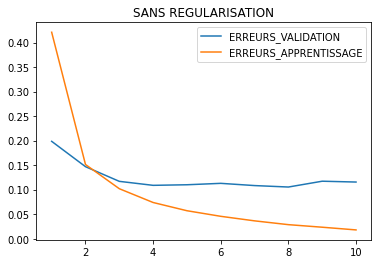

In [ ]:
plt.plot(numpy.arange(1, 11), cb.history["val_loss"], label="ERREURS_VALIDATION")
plt.plot(numpy.arange(1, 11), cb.history["loss"], label="ERREURS_APPRENTISSAGE")
plt.title("SANS REGULARISATION")
plt.legend()
plt.show()

## Regularisation L2

In [ ]:
from tensorflow.keras.regularizers import l2 #Ridge

layer1 = Dense(units=128, activation="relu", kernel_regularizer=l2(.01), input_dim=784)
layer2 = Dense(units=128, activation="relu", kernel_regularizer=l2(.01))
layer3 = Dense(units=128, activation="relu", kernel_regularizer=l2(.01))
layer4 = Dense(units=10, activation="softmax")


model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cb = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3)


Epoch 1/10
210/210 - 2s - loss: 2.1676 - accuracy: 0.8565 - val_loss: 1.0244 - val_accuracy: 0.9073 - 2s/epoch - 11ms/step
Epoch 2/10
210/210 - 2s - loss: 0.8373 - accuracy: 0.9154 - val_loss: 0.7207 - val_accuracy: 0.9161 - 2s/epoch - 8ms/step
Epoch 3/10
210/210 - 2s - loss: 0.6618 - accuracy: 0.9229 - val_loss: 0.6201 - val_accuracy: 0.9248 - 2s/epoch - 8ms/step
Epoch 4/10
210/210 - 2s - loss: 0.5941 - accuracy: 0.9285 - val_loss: 0.5601 - val_accuracy: 0.9317 - 2s/epoch - 8ms/step
Epoch 5/10
210/210 - 2s - loss: 0.5547 - accuracy: 0.9319 - val_loss: 0.5390 - val_accuracy: 0.9373 - 2s/epoch - 8ms/step
Epoch 6/10
210/210 - 2s - loss: 0.5279 - accuracy: 0.9364 - val_loss: 0.5248 - val_accuracy: 0.9336 - 2s/epoch - 7ms/step
Epoch 7/10
210/210 - 2s - loss: 0.5052 - accuracy: 0.9402 - val_loss: 0.5097 - val_accuracy: 0.9357 - 2s/epoch - 8ms/step
Epoch 8/10
210/210 - 2s - loss: 0.4903 - accuracy: 0.9410 - val_loss: 0.4786 - val_accuracy: 0.9444 - 2s/epoch - 8ms/step
Epoch 9/10
210/210 - 2s

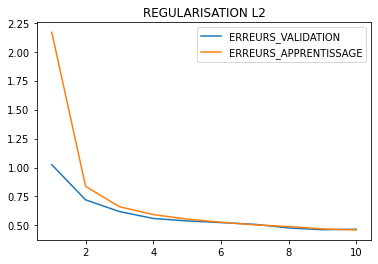

In [ ]:
plt.plot(numpy.arange(1, 11), cb.history["val_loss"], label="ERREURS_VALIDATION")
plt.plot(numpy.arange(1, 11), cb.history["loss"], label="ERREURS_APPRENTISSAGE")
plt.title("REGULARISATION L2")
plt.legend()
plt.show()

## Regularisation Drop Out

In [ ]:

from tensorflow.keras.layers import Dropout

layer1 = Dense(units=128, activation="relu", input_dim=784)
layer2 = Dense(units=128, activation="relu")
layer3 = Dense(units=128, activation="relu")
layer4 = Dense(units=10, activation="softmax")


model = Sequential()
model.add(layer1)
model.add(Dropout(rate=.3))
model.add(layer2)
model.add(Dropout(rate=.5))
model.add(layer3)
model.add(Dropout(rate=.3))
model.add(layer4)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cb = model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200, validation_split=.3)


Epoch 1/10
210/210 - 3s - loss: 1.0579 - accuracy: 0.6427 - val_loss: 0.3120 - val_accuracy: 0.9138 - 3s/epoch - 15ms/step
Epoch 2/10
210/210 - 2s - loss: 0.4940 - accuracy: 0.8533 - val_loss: 0.2326 - val_accuracy: 0.9325 - 2s/epoch - 8ms/step
Epoch 3/10
210/210 - 2s - loss: 0.3953 - accuracy: 0.8854 - val_loss: 0.2020 - val_accuracy: 0.9425 - 2s/epoch - 8ms/step
Epoch 4/10
210/210 - 2s - loss: 0.3505 - accuracy: 0.8985 - val_loss: 0.1799 - val_accuracy: 0.9487 - 2s/epoch - 8ms/step
Epoch 5/10
210/210 - 2s - loss: 0.3115 - accuracy: 0.9095 - val_loss: 0.1668 - val_accuracy: 0.9533 - 2s/epoch - 8ms/step
Epoch 6/10
210/210 - 2s - loss: 0.2917 - accuracy: 0.9165 - val_loss: 0.1545 - val_accuracy: 0.9573 - 2s/epoch - 8ms/step
Epoch 7/10
210/210 - 2s - loss: 0.2786 - accuracy: 0.9218 - val_loss: 0.1462 - val_accuracy: 0.9582 - 2s/epoch - 9ms/step
Epoch 8/10
210/210 - 2s - loss: 0.2683 - accuracy: 0.9248 - val_loss: 0.1437 - val_accuracy: 0.9596 - 2s/epoch - 8ms/step
Epoch 9/10
210/210 - 2s

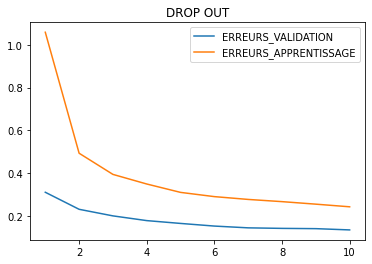

In [ ]:
plt.plot(numpy.arange(1, 11), cb.history["val_loss"], label="ERREURS_VALIDATION")
plt.plot(numpy.arange(1, 11), cb.history["loss"], label="ERREURS_APPRENTISSAGE")
plt.title("DROP OUT")
plt.legend()
plt.show()

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

CallBack = EarlyStopping(monitor='val_loss', patience=2,verbose=1, mode="auto")

layer1 = Dense(units=128, activation="relu", input_dim=784)
layer2 = Dense(units=128, activation="relu")
layer3 = Dense(units=128, activation="relu")
layer4 = Dense(units=10, activation="softmax")


model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(x_train, y_train, verbose=2, epochs=100, batch_size=200, validation_split=.3, callbacks=[CallBack])



Epoch 1/100
210/210 - 2s - loss: 0.4111 - accuracy: 0.8844 - val_loss: 0.1941 - val_accuracy: 0.9421 - 2s/epoch - 10ms/step
Epoch 2/100
210/210 - 2s - loss: 0.1483 - accuracy: 0.9562 - val_loss: 0.1499 - val_accuracy: 0.9549 - 2s/epoch - 8ms/step
Epoch 3/100
210/210 - 2s - loss: 0.1047 - accuracy: 0.9685 - val_loss: 0.1141 - val_accuracy: 0.9656 - 2s/epoch - 7ms/step
Epoch 4/100
210/210 - 2s - loss: 0.0786 - accuracy: 0.9751 - val_loss: 0.1069 - val_accuracy: 0.9689 - 2s/epoch - 7ms/step
Epoch 5/100
210/210 - 2s - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.1091 - val_accuracy: 0.9663 - 2s/epoch - 7ms/step
Epoch 6/100
210/210 - 2s - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.1055 - val_accuracy: 0.9691 - 2s/epoch - 8ms/step
Epoch 7/100
210/210 - 1s - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.1164 - val_accuracy: 0.9681 - 1s/epoch - 7ms/step
Epoch 8/100
210/210 - 1s - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.1009 - val_accuracy: 0.9724 - 1s/epoch - 7ms/step
Epoch 9/100
210

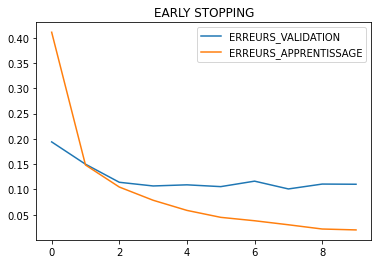

In [ ]:

plt.plot(hist.history["val_loss"], label="ERREURS_VALIDATION")
plt.plot(hist.history["loss"], label="ERREURS_APPRENTISSAGE")
plt.title("EARLY STOPPING")
plt.legend()
plt.show()


## Optimisation avec gridsearch

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='adam'):
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

seed = 7
numpy.random.seed(seed)


dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


--2022-05-18 11:15:37--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv.1’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2022-05-18 11:15:37 (28.8 MB/s) - ‘pima-indians-diabetes.data.csv.1’ saved [23278/23278]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best: 0.712240 using {'optimizer': 'Nadam'}
0.665365 (0.047343) with: {'optimizer': 'SGD'}
0.686198 (0.017566) with: {'optimizer': 'RMSprop'}
0.550781 (0.005524) with: {'optimizer': 'Adagrad'}
0.641927 (0.037377) with: {'optimizer': 'Adadelta'}
0.692708 (0.029635) with: {'optimizer': 'Adam'}
0.688802 (0.011201) with: {'optimizer': 'Adamax'}
0.712240 (0.035277) with: {'optimizer': 'Nadam'}
